# scikit-learn

こちらの[記事](https://qiita.com/msrks/items/01c51a769f24cd649459)より  
scikit learn を使って手書き数字認識をやってみよう

---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

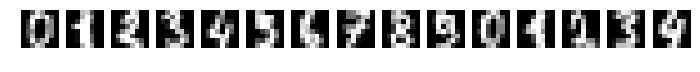

In [3]:
fig, axes = plt.subplots(ncols=15, figsize=(12,12)) #15等分

for i in range(15):
    ax = axes[i]
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_axis_off()

こんな感じのデータ群　

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2) # Xは画像データ、Yはラベルデータ

train用とtest用のデータに分ける (8:2)

### 決定木

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
clf = DecisionTreeClassifier() 

In [7]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
pred = clf.predict(X_test) # その値を使ってpredict

In [9]:
pred # 予測結果

array([9, 3, 0, 7, 3, 9, 8, 8, 8, 9, 6, 5, 9, 6, 5, 1, 8, 8, 2, 9, 8, 6, 1,
       1, 8, 1, 1, 3, 9, 8, 6, 1, 3, 8, 3, 5, 5, 9, 3, 8, 1, 2, 6, 6, 4, 3,
       8, 4, 5, 8, 8, 4, 0, 5, 7, 8, 0, 2, 8, 9, 1, 2, 4, 1, 1, 8, 9, 2, 7,
       1, 4, 5, 1, 0, 5, 1, 3, 7, 4, 6, 1, 7, 2, 3, 9, 9, 7, 0, 6, 9, 7, 0,
       5, 4, 4, 2, 5, 2, 5, 6, 8, 0, 2, 9, 6, 2, 0, 9, 9, 5, 1, 5, 3, 4, 7,
       5, 1, 0, 2, 2, 6, 8, 2, 6, 8, 2, 0, 4, 0, 5, 1, 7, 4, 4, 8, 9, 6, 7,
       7, 2, 5, 6, 8, 4, 1, 4, 4, 8, 5, 4, 8, 0, 3, 8, 5, 5, 5, 6, 4, 3, 3,
       1, 3, 0, 8, 8, 3, 1, 9, 7, 2, 0, 9, 8, 8, 4, 5, 1, 0, 8, 4, 7, 4, 5,
       0, 8, 4, 5, 6, 9, 7, 9, 9, 5, 8, 4, 6, 3, 6, 7, 0, 6, 3, 6, 0, 2, 1,
       5, 5, 1, 2, 6, 0, 1, 7, 3, 4, 9, 9, 6, 0, 6, 8, 7, 7, 5, 9, 4, 1, 1,
       2, 1, 9, 0, 9, 3, 2, 1, 4, 6, 3, 5, 2, 5, 6, 9, 5, 2, 4, 7, 0, 3, 0,
       0, 6, 8, 4, 6, 0, 2, 6, 8, 6, 2, 2, 7, 6, 8, 2, 7, 5, 8, 8, 3, 7, 5,
       4, 5, 6, 8, 2, 9, 9, 7, 4, 7, 4, 4, 1, 4, 5, 5, 1, 3, 2, 5, 7, 1, 7,
       9, 9,

In [10]:
y_test # 正解

array([9, 3, 0, 7, 3, 9, 8, 8, 8, 9, 6, 3, 8, 6, 5, 1, 8, 8, 2, 9, 8, 6, 8,
       1, 8, 1, 1, 3, 9, 4, 0, 1, 8, 8, 3, 3, 5, 9, 3, 1, 1, 2, 6, 6, 1, 3,
       7, 6, 5, 8, 7, 7, 0, 5, 7, 8, 0, 2, 8, 9, 8, 2, 4, 1, 1, 8, 9, 2, 7,
       1, 4, 5, 1, 0, 5, 1, 3, 7, 4, 6, 1, 7, 2, 3, 9, 9, 7, 0, 1, 9, 7, 0,
       5, 4, 4, 2, 5, 7, 5, 6, 8, 0, 2, 9, 4, 2, 0, 9, 9, 5, 1, 5, 3, 4, 9,
       5, 1, 0, 2, 2, 6, 8, 2, 6, 8, 2, 0, 4, 0, 5, 1, 7, 4, 4, 8, 9, 6, 7,
       7, 2, 5, 6, 8, 4, 1, 4, 4, 8, 5, 4, 8, 0, 3, 8, 5, 5, 5, 6, 7, 3, 3,
       1, 3, 0, 6, 8, 3, 1, 9, 4, 2, 0, 5, 8, 8, 4, 5, 9, 0, 1, 7, 7, 4, 5,
       0, 5, 4, 5, 6, 9, 7, 9, 9, 5, 7, 4, 6, 3, 6, 7, 0, 6, 3, 6, 0, 2, 1,
       5, 5, 1, 7, 6, 0, 1, 7, 3, 4, 1, 9, 4, 0, 6, 8, 7, 7, 5, 9, 4, 1, 1,
       2, 1, 5, 0, 9, 9, 2, 1, 4, 6, 3, 5, 3, 0, 6, 9, 5, 2, 4, 7, 0, 3, 0,
       0, 6, 8, 4, 6, 0, 2, 6, 8, 6, 2, 2, 7, 6, 8, 2, 7, 5, 0, 8, 3, 7, 5,
       4, 5, 6, 8, 2, 5, 3, 8, 4, 7, 4, 4, 1, 4, 5, 5, 1, 3, 8, 5, 7, 1, 7,
       9, 9,

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) 

0.86388888888888893

正解率は~86 %

In [12]:
accuracy_score(y_test, y_test)

1.0

これは当たり前

## Support Vector Machines¶

In [13]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
pred_svc = clf_svc.predict(X_test)
accuracy_score(y_test, pred_svc)

0.51944444444444449

正解率が低い...  
この[記事](http://may46onez.hatenablog.com/entry/2016/02/19/152532)にあるようにチューニングが必要なよう  
こちらの[記事](https://qiita.com/yhyhyhjp/items/ebda34f46369b7d3ac8e)を参考にパラメータを指定する

In [15]:
clf_svc_again = SVC(gamma=0.001, C=100.)
clf_svc_again.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
pred_svc_again = clf_svc_again.predict(X_test)
accuracy_score(y_test, pred_svc_again)

0.99444444444444446

正解率UP!!

## confusion matrix

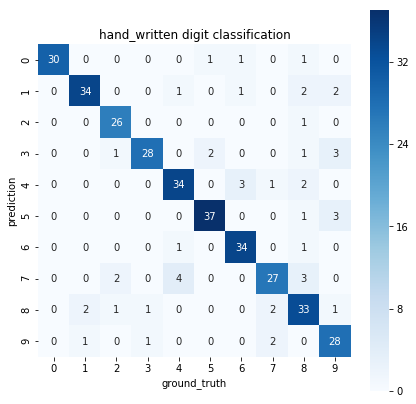

In [17]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

conf_mat = confusion_matrix(y_test, pred)
index = list("0123456789")
columns = list("0123456789")
df = pd.DataFrame(conf_mat, index=index, columns=columns)
fig = plt.figure(figsize = (7,7))
sns.heatmap(df, annot=True, square=True, fmt='.0f', cmap="Blues")
plt.title('hand_written digit classification')
plt.xlabel('ground_truth')
plt.ylabel('prediction')
fig.savefig("images/conf_mat.png")

## 結果のレポート

In [18]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95        33
          1       0.92      0.85      0.88        40
          2       0.87      0.96      0.91        27
          3       0.93      0.80      0.86        35
          4       0.85      0.85      0.85        40
          5       0.93      0.90      0.91        41
          6       0.87      0.94      0.91        36
          7       0.84      0.75      0.79        36
          8       0.73      0.82      0.78        40
          9       0.76      0.88      0.81        32

avg / total       0.87      0.86      0.86       360

